In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [8]:
# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):  # 10 classes for CIFAR-10
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),  # Adjusted kernel size
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),  # Adjusted input size based on feature map dimensions
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)  # Flatten the output for the classifier
        x = self.classifier(x)
        return x

In [12]:
# Define the transform
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [13]:
# Load the CIFAR-10 dataset
batch_size = 32
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the model
model = AlexNet(num_classes=10)

# Print the model architecture
# print(model)

Files already downloaded and verified
Files already downloaded and verified


# check the image size after each filter 

In [14]:
import torch
import torch.nn as nn

# Assuming train_loader is defined
detailer = iter(train_loader)
images, labels = next(detailer)

# Defining the layers correctly without commas
conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1)  # Adjusted kernel size
relu1 = nn.ReLU(inplace=True)
maxp1 = nn.MaxPool2d(kernel_size=2, stride=2)

conv2 = nn.Conv2d(96, 256, kernel_size=3, padding=1)
relu2 = nn.ReLU(inplace=True)
maxp2 = nn.MaxPool2d(kernel_size=2, stride=2)

conv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)
relu3 = nn.ReLU(inplace=True)

conv4 = nn.Conv2d(384, 384, kernel_size=3, padding=1)
relu4 = nn.ReLU(inplace=True)

conv5 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
relu5 = nn.ReLU(inplace=True)
maxp3 = nn.MaxPool2d(kernel_size=2, stride=2)

# Printing shapes after each operation
print("=====================================")
print("Original Image Shape: ", images.shape)
print("=====================================")
x = conv1(images)
x = relu1(x)
print("After conv1 Shape: ", x.shape)
print("=====================================")
x = maxp1(x)
print("After pool Shape: ", x.shape)
print("=====================================")
x = conv2(x)
x = relu2(x)
print("After conv2 Shape: ", x.shape)
print("=====================================")
x = maxp2(x)
print("After pool Shape: ", x.shape)
print("=====================================")
x = conv3(x)
x = relu3(x)
print("After conv3 Shape: ", x.shape)
print("=====================================")
x = conv4(x)
x = relu4(x)
print("After conv4 Shape: ", x.shape)
print("=====================================")
x = conv5(x)
x = relu5(x)
print("After conv5 Shape: ", x.shape)
print("=====================================")
x = maxp3(x)
print("After pool Shape: ", x.shape)
print("=====================================")




Original Image Shape:  torch.Size([32, 3, 32, 32])
After conv1 Shape:  torch.Size([32, 96, 32, 32])
After pool Shape:  torch.Size([32, 96, 16, 16])
After conv2 Shape:  torch.Size([32, 256, 16, 16])
After pool Shape:  torch.Size([32, 256, 8, 8])
After conv3 Shape:  torch.Size([32, 384, 8, 8])
After conv4 Shape:  torch.Size([32, 384, 8, 8])
After conv5 Shape:  torch.Size([32, 256, 8, 8])
After pool Shape:  torch.Size([32, 256, 4, 4])


In [5]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified example)
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Testing loop (optional)
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

# Class labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Epoch [1/5], Loss: 1.7125
Epoch [2/5], Loss: 1.3805
Epoch [3/5], Loss: 1.2298
Epoch [4/5], Loss: 1.1352
Epoch [5/5], Loss: 1.0581
Accuracy of the model on the test images: 61.80%


# Plot the loss and total loss 

Files already downloaded and verified

Training with SGD and learning rate 0.001
Epoch [1/10], Train Loss: 2.3025, Train Acc: 10.31%, Val Loss: 2.3025, Val Acc: 9.63%
Epoch [2/10], Train Loss: 2.3025, Train Acc: 10.21%, Val Loss: 2.3025, Val Acc: 9.67%
Epoch [3/10], Train Loss: 2.3024, Train Acc: 10.46%, Val Loss: 2.3024, Val Acc: 9.62%
Epoch [4/10], Train Loss: 2.3023, Train Acc: 10.77%, Val Loss: 2.3024, Val Acc: 9.61%
Epoch [5/10], Train Loss: 2.3022, Train Acc: 10.72%, Val Loss: 2.3023, Val Acc: 9.61%
Epoch [6/10], Train Loss: 2.3021, Train Acc: 10.77%, Val Loss: 2.3022, Val Acc: 9.61%
Epoch [7/10], Train Loss: 2.3020, Train Acc: 10.67%, Val Loss: 2.3021, Val Acc: 9.66%
Epoch [8/10], Train Loss: 2.3019, Train Acc: 11.17%, Val Loss: 2.3019, Val Acc: 10.11%
Epoch [9/10], Train Loss: 2.3018, Train Acc: 11.93%, Val Loss: 2.3018, Val Acc: 11.25%
Epoch [10/10], Train Loss: 2.3016, Train Acc: 12.27%, Val Loss: 2.3016, Val Acc: 13.46%

Training with SGD and learning rate 0.01
Epoch [1/10],

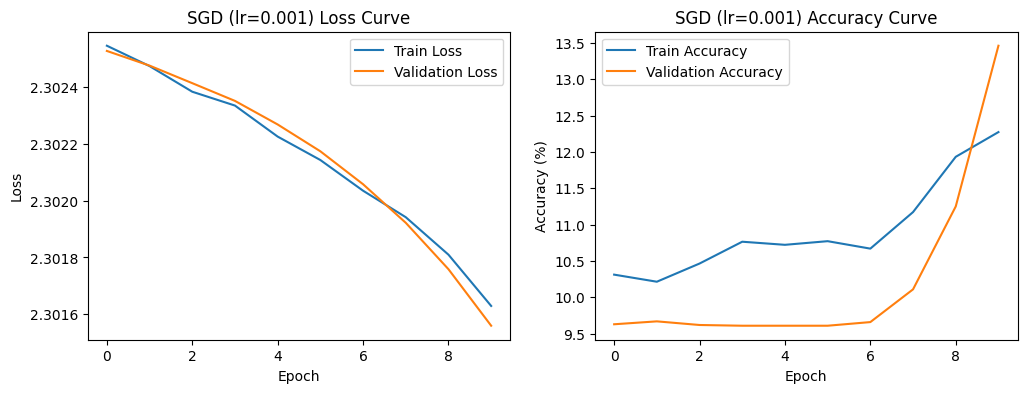

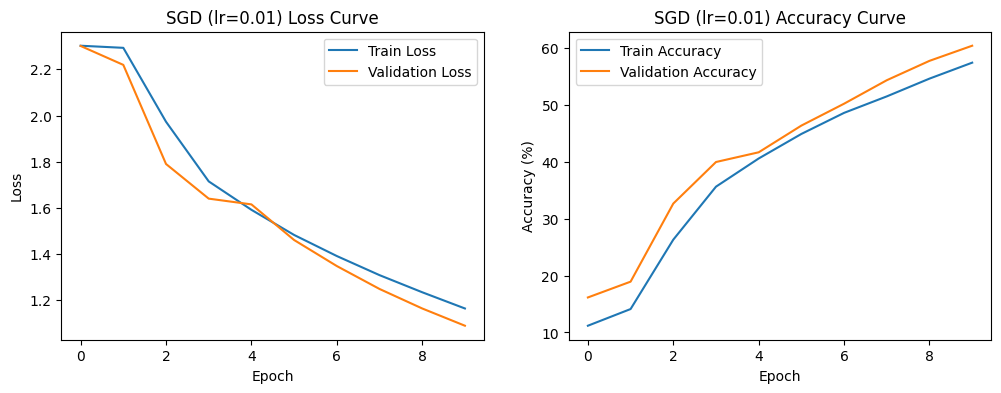

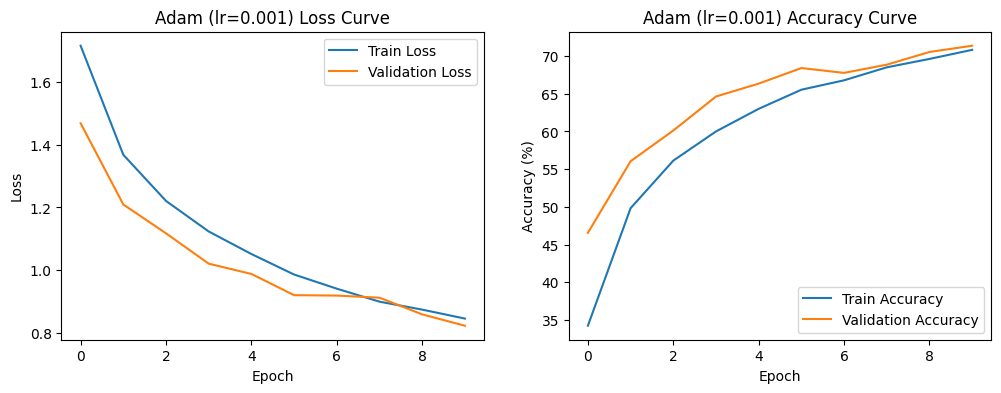

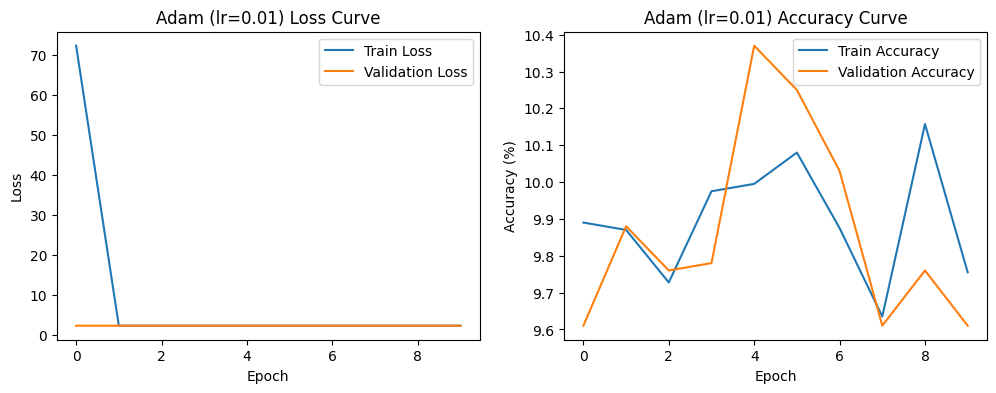

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)
        x = self.classifier(x)
        return x

# Define the transform with resizing
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
batch_size = 32
full_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)




"""
# Limit the dataset size (e.g., 1000 samples for training and 200 for validation)
limited_train_size = 800
limited_val_size = 200
print("Len of full dataset",len(full_dataset))

# Split dataset into training and validation sets with reduced sizes
train_dataset, val_dataset = random_split(full_dataset, [limited_train_size, limited_val_size])

"""

# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)





# Define training function with validation
def train_model(model, criterion, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Validate the model
        model.eval()  # Set the model to evaluation mode
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_outputs = model(val_images)
                val_loss = criterion(val_outputs, val_labels)

                val_running_loss += val_loss.item()
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()

        val_losses.append(val_running_loss / len(val_loader))
        val_accuracies.append(100 * val_correct / val_total)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
              f'Train Acc: {train_accuracies[-1]:.2f}%, '
              f'Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies

# Hyperparameter tuning example
# Hyperparameters to tune
optimizers = {
    'SGD': optim.SGD,
    'Adam': optim.Adam
}
learning_rates = [0.001, 0.01]

# Store results for each configuration
results = {}

for optimizer_name, optimizer_func in optimizers.items():
    for lr in learning_rates:
        print(f"\nTraining with {optimizer_name} and learning rate {lr}")
        model = AlexNet(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        optimizer = optimizer_func(model.parameters(), lr=lr)

        train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, criterion, optimizer)

        results[(optimizer_name, lr)] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        }

# Plotting results
def plot_results(results):
    for key, value in results.items():
        optimizer_name, lr = key
        train_losses = value['train_losses']
        val_losses = value['val_losses']
        train_accuracies = value['train_accuracies']
        val_accuracies = value['val_accuracies']

        # Loss Curves
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title(f'{optimizer_name} (lr={lr}) Loss Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy Curves
        plt.subplot(1, 2, 2)
        plt.plot(train_accuracies, label='Train Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.title(f'{optimizer_name} (lr={lr}) Accuracy Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()

        plt.show()

# Call the plotting function
plot_results(results)


# fint out the optimized hyperparameter 

In [15]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import ParameterGrid
import random

# Hyperparameter tuning ranges
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'batch_size': [32, 64],
    'optimizer': ['SGD', 'Adam'],
    'weight_decay': [0.0001, 0.0005],
}



# Define the AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)
        x = self.classifier(x)
        return x
    

    


# Function to train and evaluate the model with specific hyperparameters
def train_and_evaluate(params):
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    optimizer_choice = params['optimizer']
    
    # Load CIFAR-10 dataset and split into training/validation sets
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    full_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model, loss function, and optimizer
    model = AlexNet()
    criterion = torch.nn.CrossEntropyLoss()
    
    if optimizer_choice == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_choice == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Training loop
    num_epochs = 10
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        # Check if validation loss improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()

    return best_val_loss, best_model

# Random search for hyperparameters
best_hyperparams = None
best_loss = float('inf')

# Randomly sample 5 hyperparameter configurations
for i in range(5):
    params = {key: random.choice(param_grid[key]) for key in param_grid}
    val_loss, model = train_and_evaluate(params)
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_hyperparams = params

print(f"Best Hyperparameters: {best_hyperparams}")

Files already downloaded and verified


KeyboardInterrupt: 

# VGG-16 model


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models



# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Prepare the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (required for VGG-16)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Download and load training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)



# 2. Load the pre-trained VGG-16 model
vgg16 = models.vgg16(pretrained=True)



# 3. Modify the classifier for CIFAR-10 (10 classes)
# The original VGG-16 has 1000 output classes, so we replace the final layer
vgg16.classifier[6] = nn.Linear(4096, 10)  # CIFAR-10 has 10 output classes

# Move model to the device (GPU/CPU)
vgg16 = vgg16.to(device)



# 4. Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)  # Stochastic Gradient Descent


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)


        # Forward pass
        outputs = vgg16(images)
        
        # calculate the loss
        loss = criterion(outputs, labels)

        #Backward and Optimize
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        # if (i+1) % 2000 == 0:
        #     print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print('Finished Training')
PATH = './cnn_vgg16.pth'
torch.save(vgg16.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
# Files already downloaded and verified
# Files already downloaded and verified
# Finished Training
# Accuracy of the network: 85.39 %
# Accuracy of plane: 86.6 %
# Accuracy of car: 96.8 %
# Accuracy of bird: 78.9 %
# Accuracy of cat: 76.0 %
# Accuracy of deer: 94.2 %
# Accuracy of dog: 70.8 %
# Accuracy of frog: 86.4 %
# Accuracy of horse: 83.5 %
# Accuracy of ship: 90.6 %
# Accuracy of truck: 90.1 %

# ResNet-18 model 

In [ ]:



import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models



# 1. Prepare the CIFAR-10 dataset with transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (required for ResNet-18)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to match pre-trained weights
])


# Download and load training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# 2. Load the ResNet-18 pre-trained model
resnet18 = models.resnet18(pretrained=True)

# Modify the fully connected layer to match CIFAR-10 (10 classes)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)

# 3. Transfer the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

resnet18 = resnet18.to(device)

# 4. Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)



for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)


        # Forward pass
        outputs = resnet18(images)
        
        # calculate the loss
        loss = criterion(outputs, labels)

        #Backward and Optimize
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            
print('Finished Training')
PATH = './cnn_resnet18.pth'
torch.save(resnet18.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = resnet18(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(len(labels)):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
# Files already downloaded and verified
# Files already downloaded and verified
# cuda:0
# Finished Training
# Accuracy of the network: 79.42 %
# Accuracy of plane: 81.8 %
# Accuracy of car: 89.1 %
# Accuracy of bird: 69.2 %
# Accuracy of cat: 66.2 %
# Accuracy of deer: 84.0 %
# Accuracy of dog: 64.7 %
# Accuracy of frog: 85.2 %
# Accuracy of horse: 83.5 %
# Accuracy of ship: 87.9 %
# Accuracy of truck: 82.6 %